# Introduction

Recommendation System is a type of information filtering system. The quality of search results is improved and the items provided are more relevant to the search items.

**Keywords** : Filter, TF-IDF, Cosine Similarity

# Load the data

In [1]:
import pandas as pd
import numpy as np
df1 = pd.read_csv('.../Movie Rec/tmdb_5000_credits.csv')
df2 = pd.read_csv('.../Movie Rec/tmdb_5000_movies.csv')

The first dataset contains the following features:

movie_id - A unique identifier for each movie.
cast - The name of lead and supporting actors.
crew - The name of Director, Editor, Composer, Writer etc.

The second dataset has the following features:-

budget - The budget in which the movie was made.
genre - The genre of the movie, Action, Comedy ,Thriller etc.
homepage - A link to the homepage of the movie.
id - This is infact the movie_id as in the first dataset.
keywords - The keywords or tags related to the movie.
original_language - The language in which the movie was made.
original_title - The title of the movie before translation or adaptation.
overview - A brief description of the movie.
popularity - A numeric quantity specifying the movie popularity.
production_companies - The production house of the movie.
production_countries - The country in which it was produced.
release_date - The date on which it was released.
revenue - The worldwide revenue generated by the movie.
runtime - The running time of the movie in minutes.
status - "Released" or "Rumored".
tagline - Movie's tagline.
title - Title of the movie.
vote_average - average ratings the movie recieved.
vote_count - the count of votes recieved.

## Join the two dataset

In [2]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')

In [3]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# Filtering

In this kernel, let's try two (2) types of recommender systems :

**Demographic Filtering**
The system gives recommendations based on movie popularity
**Content Based Filtering** 
The system gives recommendations based on a particular item. It uses item metadata such as description, credits, genre, keywords, etc. to make the recommendations.

## Demographic Filtering

In this type, a metric is needed to gives/calculates score to the movies, and sort it to recommend the best rated movie to the user.

Let's take a look at some popular movies!

Text(0.5, 1.0, 'Popular Movies')

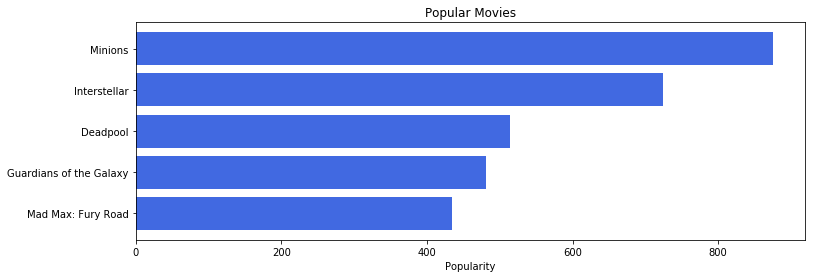

In [11]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(),pop['popularity'].head(), align='center',
        color='royalblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

Now let's use IMDB's weighted rating :
![IMDB's weighted rating](C:/Users/Romansya/Movie Rec/wr.png)

where

v is the number of votes for the movie (vote_count);
m is the minimum votes required to be listed in the chart;
R is the average rating of the movie (vote_average);
C is the mean vote across the whole report

In [5]:
C= df2['vote_average'].mean()
m= df2['vote_count'].quantile(0.9)
C,m

(6.092171559442011, 1838.4000000000015)

Filter out the movies that qualified (votes >= m)

In [6]:
qualified_movies = df2.copy().loc[df2['vote_count'] >= m]
qualified_movies.shape

(481, 23)

481 movies are qualified. Next, the weighted rating formula is used as a new feature score.

In [7]:
def weight_rat(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [8]:
qualified_movies['score'] =  qualified_movies.apply(weight_rat, axis = 1)

Next is the sorting process based on the score. Finally, the top ranking can be made.

In [9]:
top_movies = qualified_movies.sort_values('score', ascending=False)

top_movies[['title', 'score']].head(10)

,title,score
1881,The Shawshank Redemption,8.059258
662,Fight Club,7.939256
65,The Dark Knight,7.920020
3232,Pulp Fiction,7.904645
96,Inception,7.863239
3337,The Godfather,7.851236
95,Interstellar,7.809479
809,Forrest Gump,7.803188
329,The Lord of the Rings: The Return of the King,7.727243
1990,The Empire Strikes Back,7.697884


These demographic recommender provide a general chart of recommended movies to all the users. They are not sensitive to the interests and tastes of a particular user.

## Content Based Filtering

In this type, the content of the movie (description, credits, genre, keywords, etc.) is used to find its similarity with other movies.

### Plot description based

The plot description is given in the overview feature of our dataset. Let's take a look!

In [12]:
df2['overview'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

Here, TF-IDF is used.
**Term Frequency (TF)** is the relative frequency of a word in a document and is given as (term instances/total instances).
**Inverse Document Frequency (IDF)** is the relative count of documents containing the term is given as log(number of documents/documents with term)

In [13]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

20,000+ different words are used in the description of the 4800+ movies in the dataset.

Here, let's use *Cosine Similarity* to compute a similarity score.
![Cosine Similarity](C:/Users/Romansya/Movie Rec/cos.png)

In [14]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [15]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

In [16]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

Let's check it out!

In [20]:
get_recommendations('Batman Begins')

299                              Batman Forever
1359                                     Batman
428                              Batman Returns
3                         The Dark Knight Rises
65                              The Dark Knight
3854    Batman: The Dark Knight Returns, Part 2
423                              Bruce Almighty
225                                 Speed Racer
9            Batman v Superman: Dawn of Justice
68                                     Iron Man
Name: title, dtype: object

In [21]:
get_recommendations('Iron Man')

79                     Iron Man 2
31                     Iron Man 3
1868           Cradle 2 the Grave
7         Avengers: Age of Ultron
538                       Hostage
119                 Batman Begins
1290     Baahubali: The Beginning
4574                     Roadside
2044           The Little Vampire
2633    The Clan of the Cave Bear
Name: title, dtype: object

## Credits, Genre, and Keywords based

We are going to build a recommender based on the following metadata: the 3 top actors, the director, related genres and the movie plot keywords.

In [22]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

These functions will help in extracting the required information from each fature

In [23]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [24]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [25]:
# Define new director, cast, genres and keywords features that are in a suitable form.
df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [27]:
# Print the new features of the first 5 films
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(5)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,"[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton,"[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"


The next step would be to convert the names and keyword instances into lowercase and strip all the spaces between them.

In [28]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [29]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

Make a string that contain all the metadata for the vectorizer

In [31]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

In [32]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [33]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [34]:
# Reset index of our main DataFrame and construct reverse mapping as before
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

Again, let's check it out!

In [35]:
get_recommendations('Batman Begins', cosine_sim2)

3          The Dark Knight Rises
65               The Dark Knight
4638    Amidst the Devil's Wings
1196                The Prestige
1742              Brick Mansions
3603           Lone Wolf McQuade
982                Run All Night
3326              Black November
1503                      Takers
1986                      Faster
Name: title, dtype: object

In [36]:
get_recommendations('Iron Man', cosine_sim2)

79                      Iron Man 2
7          Avengers: Age of Ultron
16                    The Avengers
26      Captain America: Civil War
31                      Iron Man 3
39                    TRON: Legacy
4401           The Helix... Loaded
83                      The Lovers
193                    After Earth
4117            Six-String Samurai
Name: title, dtype: object